# Python for research

## Week 1




In [ ]:
def update():
  
  x.append(1)

x = [1,1]
update()
x

[1, 1, 1]

In [ ]:
def update(x,n):
  n = 2
  x.append(4)
  print('update: ', n, x)

def main():
  n = 1
  x = [0,1,2,3]
  print('main: ', n, x)
  update(x,n)
  print('main: ', n, x)

main()

main:  1 [0, 1, 2, 3]
update:  2 [0, 1, 2, 3, 4]
main:  1 [0, 1, 2, 3, 4]


## Week2

### Numpy

In [ ]:
import numpy as np

x = np.array([[3,6], [5,7]])
y = x.transpose()
y


array([[3, 5],
       [6, 7]])

In [ ]:
a = np.array([1,2])
b = np.array([3,4,5])
c=b[1:]
b[a] is c

False

In [ ]:
x = 20
np.any([x%i == 0 for i in range(2,x)])

True

### Part 3: Matplotlib Pyplot

(array([0.09129, 0.26424, 0.44017, 0.59124, 0.71034, 0.7992 , 0.86261,
        0.90768, 0.93817, 0.95915, 0.97283, 0.9824 , 0.98845, 0.99231,
        0.99513, 0.99682, 0.99793, 0.99866, 0.99913, 0.99947, 0.99964,
        0.99975, 0.99986, 0.99991, 0.99994, 0.99995, 0.99999, 0.99999,
        0.99999, 1.     ]),
 array([1.62896308e-02, 1.50546181e+00, 2.99463398e+00, 4.48380616e+00,
        5.97297833e+00, 7.46215051e+00, 8.95132268e+00, 1.04404949e+01,
        1.19296670e+01, 1.34188392e+01, 1.49080114e+01, 1.63971836e+01,
        1.78863557e+01, 1.93755279e+01, 2.08647001e+01, 2.23538723e+01,
        2.38430444e+01, 2.53322166e+01, 2.68213888e+01, 2.83105610e+01,
        2.97997331e+01, 3.12889053e+01, 3.27780775e+01, 3.42672497e+01,
        3.57564218e+01, 3.72455940e+01, 3.87347662e+01, 4.02239384e+01,
        4.17131105e+01, 4.32022827e+01, 4.46914549e+01]),
 <a list of 1 Patch objects>)

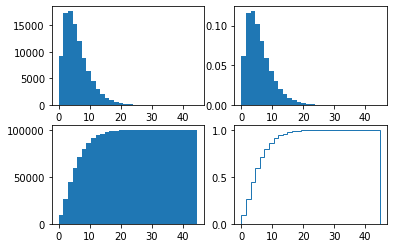

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  8 18:22:25 2022

@author: Sherwood
"""
import numpy as np
import matplotlib.pyplot as plt

# # crt+1 for comment/uncomment

# x = np.logspace(-1, 1, 20)
# y1 = x**2
# y2 = x**1.5
# plt.loglog(x, y1, "bo-", linewidth = 2, markersize = 2, label = "$Variación 1$")
# plt.semilogy(x, y2, "cs-", linewidth = 1, markersize = 3, label = "$Variación 2$")
# plt.xlabel("$X$")
# plt.ylabel("$Y$")
# plt.axis([-10, 20, -10, 200])
# plt.legend(loc = "right")
# #runcell(0, 'C:/Users/amoam/untitled5.py')
# #plt.savefig("plot.png")


# x = np.logspace(0,1,10)
# y = x**2
# plt.loglog(x, y, "bo-")

x = np.random.gamma(2, 3, 100000)

#plt.hist(x, bins  = 30)

plt.figure()
plt.subplot(221)
plt.hist(x, bins = 30)
plt.subplot(222)
plt.hist(x, bins = 30, density=True, stacked=True)
plt.subplot(223)
plt.hist(x, bins = 30, cumulative = True)
plt.subplot(224)
plt.hist(x, bins = 30, density=True, stacked=True, cumulative = True, histtype = "step")


# Wavelets

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()

dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

scales = np.arange(1, 128)
plot_signal_plus_average(time, signal)
plot_fft_plus_power(time, signal)
plot_wavelet(time, signal, scales)

NameError: ignored

In [ ]:
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T
 
xa = np.linspace(0, t_n, num = N)
xb = np.linspace(0, t_n//4, num = N//4)
 
frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)
 
composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])
 
f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)
 
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)
(...)
plt.tight_layout()
plt.show()

In [ ]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


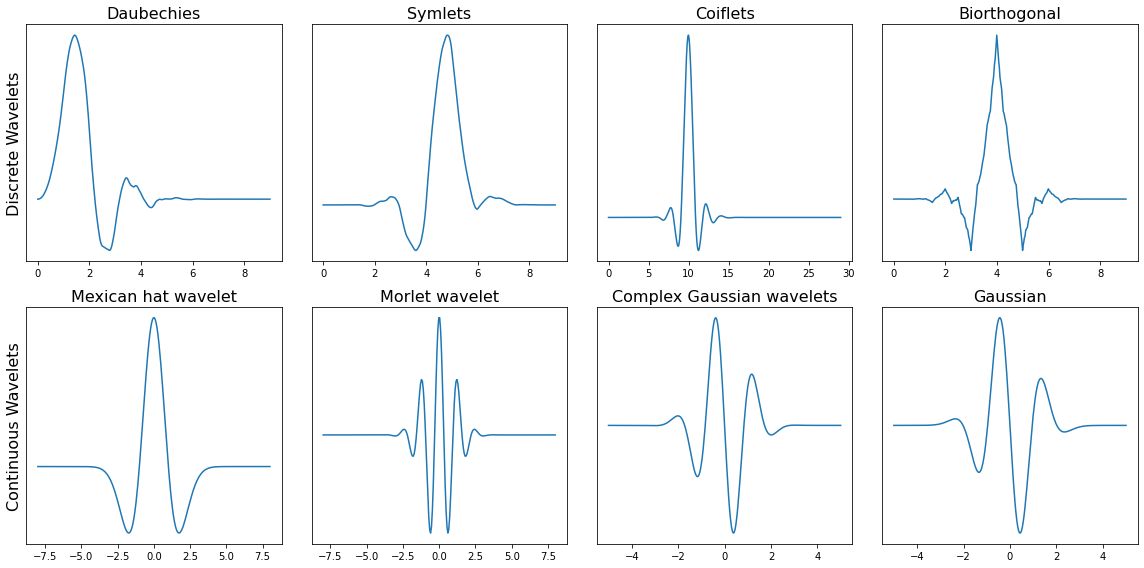

In [ ]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

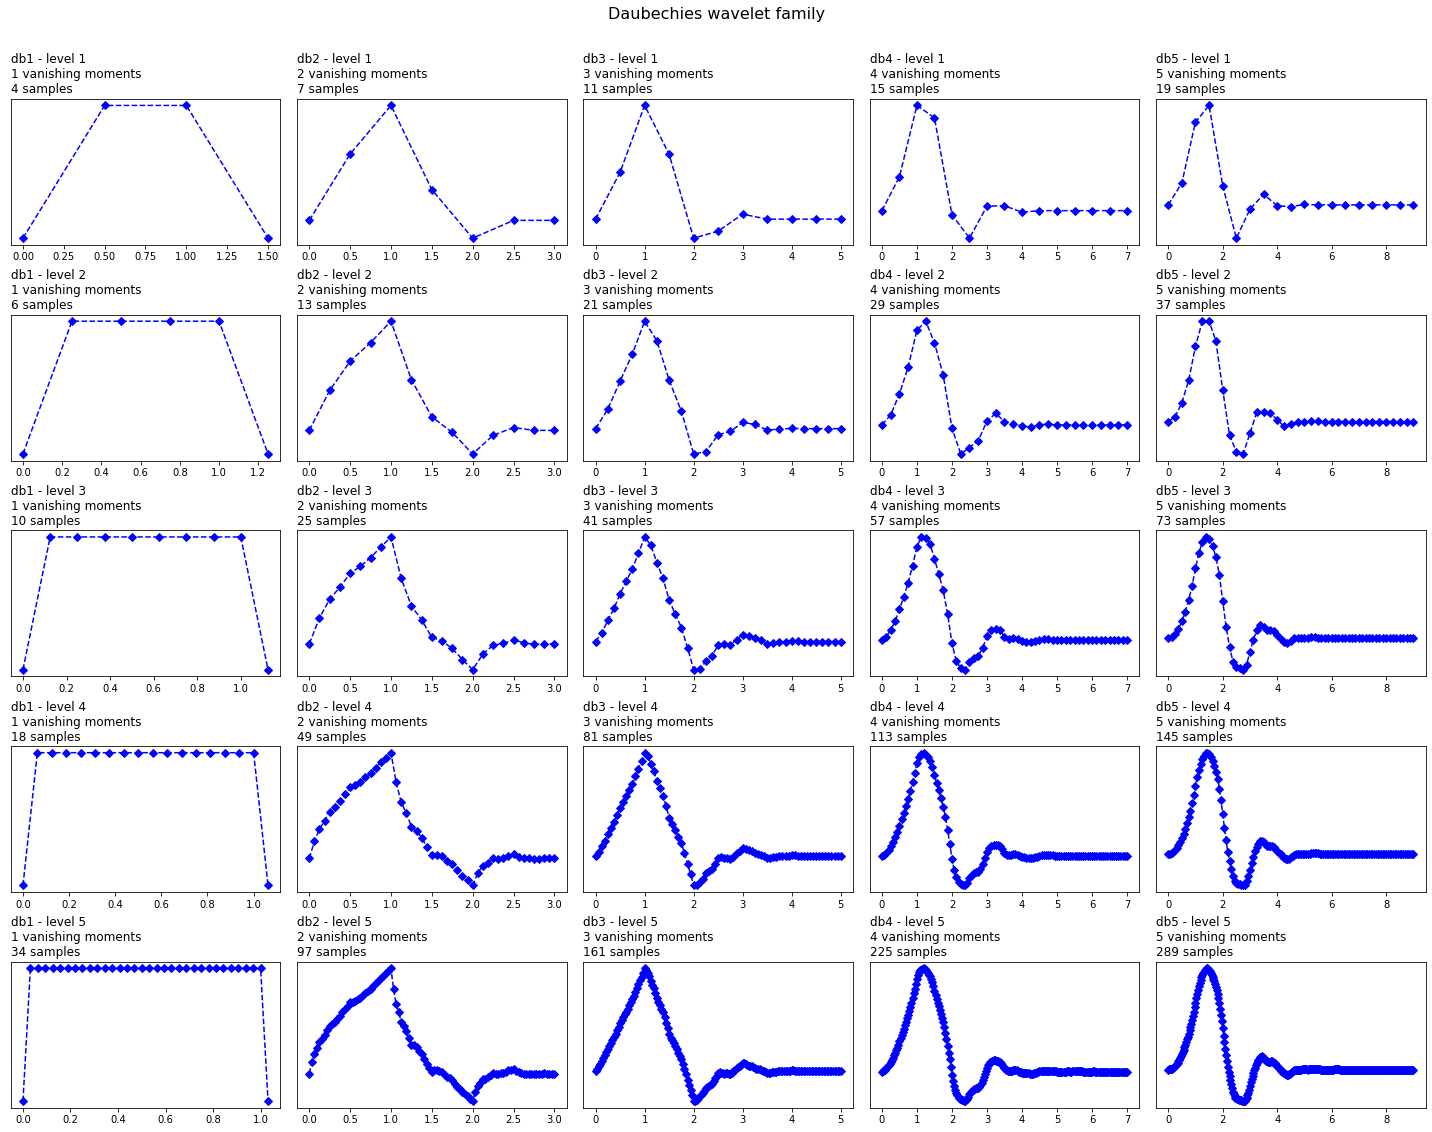

In [ ]:
db_wavelets = pywt.wavelist('db')[:5]
#print(db_wavelets) # muestra un array de la wavelet db desde 1 hasta 5
fig, axarr = plt.subplots(ncols = 5, nrows = 5 , figsize = (20,16))
fig.suptitle('Daubechies wavelet family', fontsize = 16)
for col_no, waveletname in enumerate(db_wavelets):
  wavelet = pywt.Wavelet(waveletname)
  no_moments = wavelet.vanishing_moments_psi
  family_name = wavelet.family_name
  for row_no, level in enumerate(range(1,6)):
    wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
    axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
        waveletname, level, no_moments, len(x_values)), loc='left')
    axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
    axarr[row_no, col_no].set_yticks([])
    axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()